[View in Colaboratory](https://colab.research.google.com/github/RaulMedeiros/Neural_Nets/blob/master/Intro_to_Neural_Networks.ipynb)

In [2]:
# Import libraries and modules
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D
from keras.optimizers import SGD,Adam

Using TensorFlow backend.


# DATA

### Generate Data

In [0]:
# Dataset genarator settings
num_features = 4
num_train_samples = 100
num_test_samples = 50
num_classes = 3

In [4]:
# Generate dummy data
x_train = np.random.random((num_train_samples, num_features))
y_train = np.random.randint(num_classes, size=(num_train_samples, num_classes)) 
x_test = np.random.random((num_test_samples, num_features))
y_test = np.random.randint(num_classes, size=(num_test_samples, num_classes)) 

print( " x_train:",x_train.shape, "\n",
        "y_train:", y_train.shape,"\n",
        "x_test:", x_test.shape,  "\n",
        "x_test:", y_test.shape )

 x_train: (100, 4) 
 y_train: (100, 3) 
 x_test: (50, 4) 
 x_test: (50, 3)


### Load Data

(4, 3)

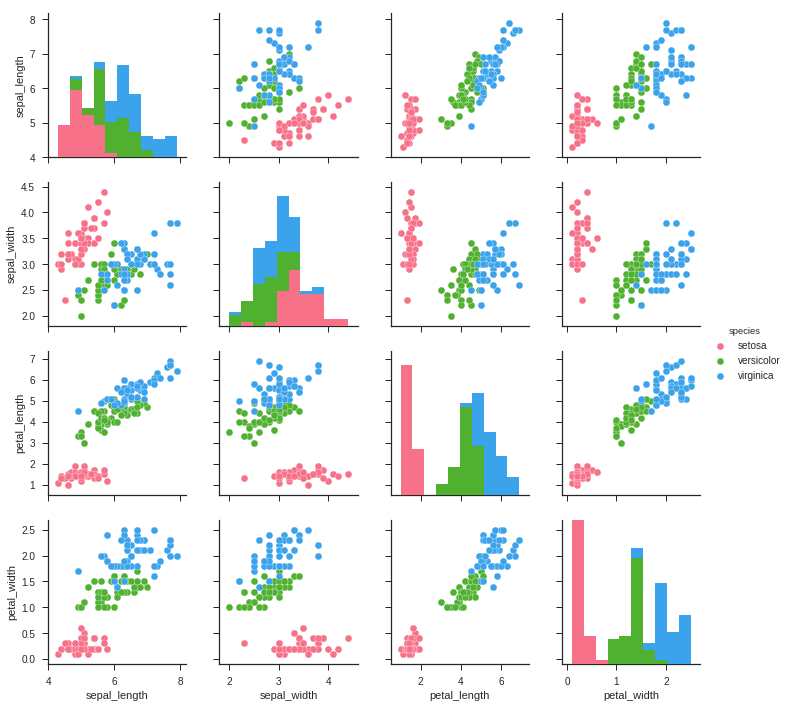

In [5]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

dataset = sns.load_dataset("iris")
g = sns.pairplot(dataset, hue="species", palette="husl",aspect=1)

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

num_features = len(X[0])
num_classes = len(np.unique(y))

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

num_features,num_classes

In [6]:
#Splitting the data into training and test test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

print( " x_train:",x_train.shape, "\n",
        "y_train:", y_train.shape,"\n",
        "x_test:", x_test.shape,  "\n",
        "x_test:", y_test.shape )

 x_train: (120, 4) 
 y_train: (120, 3) 
 x_test: (30, 4) 
 x_test: (30, 3)


# MODEL

### Perceptron

In [7]:
# Build Model
model = Sequential()
model.add(Dense(num_classes,input_dim=num_features, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


### Multi-layer Perceptron

In [24]:
# Build Model
model = Sequential()
model.add(Dense(64, input_dim=num_features, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 195       
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


### Multi-layer Perceptron w/ DropOut

In [9]:
# Build Model
model = Sequential()
model.add(Dense(64, input_dim=num_features, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Train settings 
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.005),
              metrics=['accuracy'])

# Trains the model 
model.fit(x_train, y_train,
          epochs=10,  
          batch_size=16) # usually multiple of 2 (for GPU efficiency)

Epoch 1/10
120/120 [==============================] - 0s 3ms/step - loss: 1.0313 - acc: 0.4167
Epoch 2/10
120/120 [==============================] - 0s 131us/step - loss: 0.8217 - acc: 0.7750
Epoch 3/10
120/120 [==============================] - 0s 142us/step - loss: 0.6942 - acc: 0.8250
Epoch 4/10
120/120 [==============================] - 0s 155us/step - loss: 0.6011 - acc: 0.7000
Epoch 5/10
120/120 [==============================] - 0s 133us/step - loss: 0.5219 - acc: 0.8083
Epoch 6/10
120/120 [==============================] - 0s 143us/step - loss: 0.4514 - acc: 0.8250
Epoch 7/10
120/120 [==============================] - 0s 197us/step - loss: 0.4041 - acc: 0.9333
Epoch 8/10
120/120 [==============================] - 0s 151us/step - loss: 0.3786 - acc: 0.8833
Epoch 9/10
120/120 [==============================] - 0s 168us/step - loss: 0.3587 - acc: 0.9250
Epoch 10/10
120/120 [==============================] - 0s 193us/step - loss: 0.3285 - acc: 0.9083


In [29]:
y_pred = model.predict(x_test)

# computes 
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

#Evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report')
print(classification_report(y_test_class,y_pred_class))
print('Confusion Matrix')
print(confusion_matrix(y_test_class,y_pred_class))

Classification Report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.92      0.96        13
          2       0.86      1.00      0.92         6

avg / total       0.97      0.97      0.97        30

Confusion Matrix
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


# Want more? Answer the following questions:
### What is Loss/objective function?
### What are Dense/Fully Connected Layers?
### What is Optimizer? Adam!? SGD!?
### What is Activation function? (What's the differece between ReLU and Sigmoid?)
### What is DropOut? (Bagging?) 
### What is Evaluation Metrics? (What are the most commum metrics for classification tasks)
### What is Cross Valitation? (Why we need Train an Teste sets?)








